# Kannada MNIST Classification Problem - Group S

# Team Members

1. Stewart Anderson - 201994184
2. Lewis Johnston - 201979646
3. Scott Davies - 201988979
4. Annie Benzie - 201971007

# 1. Introduction

The Kaggle dataset that we will be using is the Kannada MNIST dataset which consists of 70,000 images of digits (60,000 for training and 10,000 for testing). Furthermore, every image in the dataset is labelled with it's corresponding digit. The digits range from 0 to 9 and have been handwritten by volunteers in India. The language of Kannada is one of 22 languages in India and is the official language of the Karnataka state. 

With respect to the Kannada MNIST dataset we are using, there are only 3 variables: Id, Label and Pixels. However, there are 786 columns due to these pixels. Each image contains 784 features because an image is represented by 28 x 28 pixels. Therefore, each feature is a representation of a single pixels intensity, ranging from 0 (white) to 255 (black).

The main aim of this assignment is to use machine learning in the form of deep neural networks (DNN) to be able to classify each digit in the test dataset correctly. Firstly, we tried to implement an original artificial neural network (ANN) and then moved to more complex models in the form of convolutional neural networks (CNN) and convolutional recurrent neural networks (CRNN).

With reference to the CNN model, CNN's are known for performing very well in image analysis and classification and so choosing to implement this method was an obvious choice. In addition, the CRNN was also utilised to determine if any benefits could be obtained from the Recurrent Neural Network (RNN) architecture situated at the end of the model. RNN models are better suited to sentiment analysis, however, there has been extensive work carried out using the combination of these two prominent networks. As a result, we wanted to investigate if a mixed model could be utilised for the image classification of the Kannada MNIST dataset, and compare it to the obvious choice.

# 2. Retrieving Datasets from Kaggle

**NB**: If the Kannada MNIST training and test sets are already on the system then there is no need for section 2. Therefore, proceed to section 3 where relevant packages are imported.

In [1]:
from google.colab import files 
files.upload() # Uploading the files from Kaggle

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"stewarta96","key":"9c9b4a7a39fb128a98c63dd47e3e5350"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
 ## Retrieving the training and test datasets from the Kaggle competition page

!kaggle competitions download -c cs98x-kannada-mnist

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
training.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


# 3. Importing Relevant Packages

In [4]:
"""
        Importing Packages and Libraries

""" 

import numpy as np # Import the numpy package for working with arrays
import pandas as pd # Import the pandas package for working with dataframes
import matplotlib.pyplot as plt # Import the matplotlib package for any relevant plots we wish to visualise
import seaborn as sns # Import the seaborn package for data visualisation


%tensorflow_version 1.x # Certain aspects will not run in tensorflow 2.x so this will revert back to 1.x
import tensorflow as tf # Import tensorflow for working with deep neural networks
from tensorflow import keras # Keras is the essential API from tensorflow to work with neural networks

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # Certain aspects will not run in tensorflow 2.x so this will revert back to 1.x`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


# 4. Importing and Viewing the Dataset

Once the essential libraries are imported above, we will now investigate the data we will be working on. As can be seen below, the Kannada MNIST dataset has already been separated into a training and test set. The shapes of both datasets have been given to show that the data has been imported correctly. As it is clearly shown, the test dataset has a column missing ("label") which should be the case as we are trying to predict these digit labels.

In [0]:

"""
        Importing Kannada MNIST Datasets (Training and Testing)

"""

mnist_train = pd.read_csv("/content/training.csv.zip", low_memory=False) # Importing the spotify training dataset
mnist_test = pd.read_csv("/content/test.csv.zip", low_memory=False) # Importing the spotify test dataset

In [6]:
mnist_train.shape # Determining the size of the training set

(60000, 786)

In [7]:
mnist_test.shape # Determining the size of the test set

(10000, 785)

In [8]:
mnist_train.head() # Allows us to visualise the first five values for each attribute in the training set

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
mnist_train.describe() # Gives a summary of statistics (count, mean, standard deviation etc) of the training set attributes

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0
mean,30000.500000,4.500000,0.0,0.0,0.0,0.003350,0.002700,0.008817,0.029467,0.042017,0.075933,0.115883,0.176117,0.24455,0.222183,0.205267,0.129350,0.051617,0.022217,0.010200,0.005383,0.004500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002900,0.0,0.0,0.0,0.003350,0.003400,0.004367,0.053050,0.142250,0.286950,0.691500,...,0.927767,0.571633,0.469783,0.525783,0.370483,0.278017,0.144767,0.056617,0.027383,0.013667,0.006800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008500,0.050633,0.145167,0.215550,0.362900,0.408600,0.415833,0.424733,0.405717,0.303267,0.123933,0.057250,0.017467,0.013183,0.017400,0.02570,0.015617,0.008183,0.003783,0.003400,0.002717,0.0
std,17320.652413,2.872305,0.0,0.0,0.0,0.820579,0.661362,1.474271,2.700491,2.918309,3.993023,4.795036,5.874145,7.06010,6.652400,6.195649,5.053904,3.016660,2.088539,1.128635,0.938511,0.780784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.710352,0.0,0.0,0.0,0.820579,0.832827,0.854689,3.512156,5.652343,7.745724,11.982185,...,13.285810,10.345211,9.184474,10.524802,8.894604,7.845722,5.752243,3.650589,2.387222,1.673836,1.177785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.472231,3.499396,5.680598,6.666483,8.808337,9.385912,9.496864,9.584616,9.389786,7.937053,4.885612,3.179446,1.650426,1.788061,1.659641,2.21439,1.920868,1.225551,0.926724,0.832827,0.665445,0.0
min,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,15000.750000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [10]:
mnist_test.head() # Allows us to visualise the first five values for each attribute in the test set

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,60001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,60002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 5. Exploratory Data Analysis (EDA)

**5.1 Visualising the Distribution of Data**

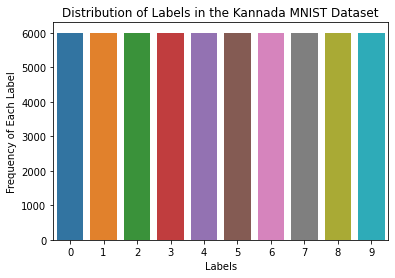

In [11]:
num_of_labels = mnist_train.label.value_counts()
sns.barplot(num_of_labels.index, num_of_labels)

plt.xlabel("Labels")
plt.ylabel("Frequency of Each Label")
plt.title("Distribution of Labels in the Kannada MNIST Dataset")

num = num_of_labels.index.values

Upon examination of the bar chart, it can be seen that all 10 digits have an evenly split frequency of occurences in the training dataset. As a result, the data can be described as being homogeneously distributed. However, if the data was somewhat skewed and imbalanced, then we could have applied two techniques to combat this:

1. Data augmentation could have been used to provide more data for labels which had a low frequency of occurences.
2. As the Kannada MNIST dataset is relatively large, we could have simply dropped data from the labels with a high frequency of occurences.

As you can imagine, both of these techniques involve striking a balance on all 10 digit labels. This would then provide the training data with a low bias, which is what we would be aiming for if this needed to be carried out.

**NB**: It is worth noting that data augmentation was still carried out to improve the CNN and CRNN models during this investigation.

**5.2 Visualising Images of Handwritten Digits**

Visualisation of the digit 2 in Kannada Style


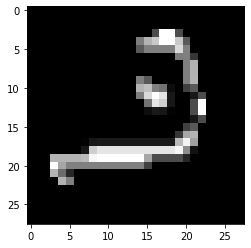

In [12]:
digit = 2
pixels = mnist_train.iloc[digit, 2:].values.reshape(28,28)
print("Visualisation of the digit " + str(digit) + " in Kannada Style")
plt.imshow(pixels, cmap = plt.get_cmap("gray"))
plt.show()

As we are using a variant of the original MNIST dataset, we believed it was beneficial to include an image of one of the digits. By referring to the image of the single handwritten digit above, it is clear to see that these digits are difficult to classify. Therefore, this shows the complexity of the Kannada MNIST dataset and is the reason why DNN's are used for machine learning.

**NB**: To change the digit from "2" to any other digit between 0 and 9, we would simply change the value of the variable "digit".

# 6. Preparing the Data for Machine Learning Models

Firstly, we have separated the training data into features (mnist_train) and labels (mnist_labels). We have also created a new test dataset with the "id" column removed (mnist_test_new). In the next 3 sub-sections, we completed our preparation of our training dataset by carrying out the following:

1. Reshaping the Training and Testing Datasets
2. One-Hot-Encoding of Training Label Values
3. Normalisation of the Training Data
4. Training-Validation set split (Cross-Validation)

**6.1 Separating the Datasets into Features and Labels**

In [0]:
"""
        Separating the training data into data and labels

"""

mnist_labels = mnist_train["label"].copy() # Creating a labels variable for the 'label' attribute

mnist_train = mnist_train.drop(["id", "label"], axis=1) # Creating a new dataset with the id and target variables removed
mnist_test_new = mnist_test.drop("id", axis=1) # Creating a new dataset with the id variable removed



In [0]:
mnist_train=mnist_train.iloc[:,:].values
mnist_labels=mnist_labels.iloc[:,].values

mnist_test_new = mnist_test_new.iloc[:,:].values

**6.2 Reshaping the Training and Testing Datasets for CNN and DCGAN** 

The original shape of the Kannada MNIST dataset, mnist_train, has the dimensions: 60,000 x 784. This flattened image data is still compatible for our original ANN. However, this is not quite the case for our CNN and CRNN models. The shape for both of these models needs to be converted to the dimensions: 60,000 x 28 x 28 x 1. The dimensions have to be changed because the images are created by 28 x 28 pixels, with a single colour channel (greyscale). 

**NB**: If we were working with the Kannada MNIST dataset consisting of coloured images, our training data shape would change to the following dimensions: 60,000 x 28 x 28 x 3. The colour channel will change from a "1" to a "3" as we would essentially be using the RGB (red, green, blue) colour channels.

In [0]:
mnist_train_cnn = mnist_train.reshape(mnist_train.shape[0],28,28,1)
mnist_test_new_cnn = mnist_test_new.reshape(mnist_test_new.shape[0],28,28,1)

In [16]:
mnist_train_cnn.shape

(60000, 28, 28, 1)

In [17]:
mnist_test_new_cnn.shape

(10000, 28, 28, 1)

In [0]:
mnist_train_crnn = mnist_train.reshape(mnist_train.shape[0],28,28,1)
mnist_test_new_crnn = mnist_test_new.reshape(mnist_test_new.shape[0],28,28,1)

In [19]:
mnist_train_crnn.shape

(60000, 28, 28, 1)

In [20]:
mnist_test_new_crnn.shape

(10000, 28, 28, 1)

**6.3 One-Hot-Encoding Of MNIST label Values** 

With respect to all three of our models, we had to convert the labelled values to one-hot-encoding values. As the Kannada MNIST dataset provides numeric labels, this step was not essential as only categorical data is ineligible for our models to work. Having said that, one-hot-encoding allows us to categorize the labels, which allows our models to operate more effectively. For example, the digit label "6" would be categorized as: [0,0,0,0,0,0,1,0,0,0].

In [0]:
mnist_labels = keras.utils.to_categorical(mnist_labels,10)

**6.4 Normalisation of the Training Data**

Normalisation, from a statistics reference, is a method in which data values on different scales are adjusted to fit onto a notionally common scale. It is preferrable that we normalise our training data here as ANN's generally have small weight values, whereas, our inputs are relatively large. Therefore, training our models will be much slower if we do not normalise the data.

For image processing applications such as this, generally the inputs are normalised to the scale 0-1. As shown below, this is done by dividing by 255.0. It is worth noting that as we are now working in the range 0-1, we need to make the division a floating point number, otherwise all inputs will be either a "0" or a "1". Furthermore, we are dividing the data by 255.0 because every pixel has an integer value between 0 (white) and 255 (black).

In [0]:
mnist_train = mnist_train / 255.0 # Normalizing the training data for the original ANN
mnist_train_cnn = mnist_train_cnn / 255.0 # Normalizing the training data for the CNN
mnist_train_crnn = mnist_train_crnn / 255.0 # Normalizing the training data for the CRNN

**6.5 Training-Validation Set Split (Cross-Validation)**

In order for our models to generalise well while training, we need to use cross-validation. This technique splits the training data into a new training set and a validation set. The validation set is needed to compare with the new training set to check specifically for overfitting. If the new training data has a much higher accuracy than the validation data, then overfitting is likely to be occuring in that model.

In this Kaggle competition, the test dataset has been given without the digit labels for predictions. Therefore, the accuracy of the training data relative to the validation data mentioned above, is crucial in determining whether our models will have accurate test predictions before uploading onto Kaggle. For this task, we decided to give the training and validation data a split of 90:10, respectively. As the Kannada MNIST dataset has 60,000 training samples, we believed a 10% validation split was sufficient.

**6.5.1 Original ANN**

In [0]:
"""
        Separating the data and labels into a validation set and a normal training set

"""

X_valid, X_train = mnist_train[:6000], mnist_train[6000:]
y_valid, y_train = mnist_labels[:6000], mnist_labels[6000:]

## Means we have a 10% validation set and 90% training set

X_test = mnist_test_new

**6.5.2 CNN**

In [0]:
"""
        Separating the data and labels into a validation set and a normal training set

"""

X_valid_cnn, X_train_cnn = mnist_train_cnn[:6000], mnist_train_cnn[6000:]
y_valid_cnn, y_train_cnn = mnist_labels[:6000], mnist_labels[6000:]

## Means we have a 10% validation set and 90% training set

X_test_cnn = mnist_test_new_cnn

In [25]:
X_train_cnn.shape

(54000, 28, 28, 1)

**6.5.3 CRNN**

In [0]:
"""
        Separating the data and labels into a validation set and a normal training set

"""

X_valid_crnn, X_train_crnn = mnist_train_crnn[:6000], mnist_train_crnn[6000:]
y_valid_crnn, y_train_crnn = mnist_labels[:6000], mnist_labels[6000:]

## Means we have a 10% validation set and 90% training set

X_test_crnn = mnist_test_new_crnn

In [27]:
X_test_crnn.shape

(10000, 28, 28, 1)

# 7. Data Augmentation

Data augmentation is essentially a regularisation technique to prevent overfitting of the data. This method artificially creates more training data samples by generating very similar variants of each training sample instance. To be able to carry out this process, we cannot simply add white noise to these samples. By referring to our code below, we can implement the following variations:

1. Image rotation
2. Shift in the width of an image
3. Shift in the height of an image
4. Shearing change of an image
5. A zoomed in variant of an image
6. Flipping an image horizontally

From the 6 variations described above, the images should change their appearance slightly, giving us more training data to work with. Crucially, these transformations do not change a samples label, otherwise this could not be implemented. Moreover, earlier in this notebook we stated that the training data was homogeneously distributed. However, despite this, CNN  and CRNN models require data augmentation to improve the accuracy of predictions.

In [28]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.25, height_shift_range = 0.30,
                               shear_range = 0.15, zoom_range = 0.30, horizontal_flip = False)

Using TensorFlow backend.


In [0]:
valid_datagen = ImageDataGenerator()

# 8. Training and Evaluating on the Training Set

The three neural network models we have decided to use for the Kannada MNIST classification problem are:

1. An original ANN
2. A CNN
3. A CRNN

# 8.1 Original Artifical Neural Networks (ANNs)

All three of our neural network models use the Sequential model. The reason for this is that it is the simplest model that can be implemented using keras and is composed of a single stack of layers connected sequentially. With respect to our original ANN model, we decided that this simple model would start us off for two reasons:

1. To make sure that our training data was fitting correctly to the model and that our code was also working effectively.
2. To determine a baseline accuracy which would then allow us to create two more complex models to achieve higher accuracy on the Kannada MNIST dataset.

**8.1.1 Building the Model**

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape = [784]))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation= 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


For our original ANN model architecture, we decided to keep the training data as a flattened input shape of 60,000 x 784. We also used two hidden layers which incorporated the "ELU" activation function. The exponential linear unit (ELU) was proposed in 2015 and was said to have outperformed all variants of the rectifying linear unit (ReLU). There were certain differences between these two activation functions that stand out, one of which being that the ELU has a non-zero gradient at z < 0, which eliminates the problem regarding dead neurons.

Two other key factors in our architecture here, and which have also been applied to our other two models, is that of dropout and batch normalisation. In terms of regularisation techniques, dropout has perhaps been the most common since it was first introduced back in 2012. The process simply gives each neuron a probability (0.3 in our case) of being temporarily "dropped out" from training. This is extremely effective in DNN architecture because there are so many neurons which have the potential to overfit the data. With regards now to batch normalisation, this was first introduced in 2015 and this addressed the problem of vanishing/exploding gradients reappearing during model training. The process simply normalises each input and introduces two new parameter vectors; one for shifting the data and one for scaling the data.

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0

The "summary()" method above is an excellent way to view how the data is passed through the network from the input layer to the output layer. This will become more beneficial when analysing our two complex models as it is difficult to refer to the code. Furthermore, this method allows us to distinguish how many parameters are being used in our model.

It is worth noting that the "Dense" layers associated with the Sequential models inherit many parameters. For example, there are 235,500 parameters in the first hidden layer alone! This is because there are 784 x 300 connection weights and 300 bias terms which are carried forward as inputs to the next layer. The problem with having so many parameters is the risk of overfitting the models, however, as discussed already, dropout is key to limiting this phenomenon.

In [32]:
model.layers

**8.1.2 Compiling the Model**

In [0]:
model.compile(loss = "categorical_crossentropy", # as we are using one-hot encode for the label data
              optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              #optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              metrics = ["accuracy"])

We will compile all three models using the exact same loss function, optimiser and metric. In terms of the loss function, we have used categorical cross-entropy as this is  a classification problem. Moreover, we don't use sparse categorical cross-entropy as we have one-hot encoded our labels. In regards to the optimiser, stochastic gradient descent is perhaps the most common. However, for our particular dataset, the two most effective that were tried were "Nadam" and "RMSprop", with "Nadam" giving slightly better results.

The Nadam optimiser we have decided to use is a variation of adaptive moment estimation (Adam) and Nesterov accelerated gradient (NAG). The Adam variant is essential for moment optimisation. On the other hand, the NAG variant measures the cost function gradient slightly ahead of it's local position. This allows the momentum vector to be tweaked to it's optimal direction. Therefore, we believe Nadam was the most viable optimiser to use for this specific investigation.

In [0]:
"""
        Callbacks
"""

#Learning Rate Scheduler/Reduction
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor = "val_loss", patience=20, verbose=1, factor = 0.005, min_lr = 0.00001)

early_stopping_lr = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20)

Above we have implemented callbacks. These are functions that are utilised during the training phase of our model and can aid with making sure our model is continually learning and improving. The learning rate scheduler has been built to alter the learning rate when there is an insignificant improvement in the validation loss of the model for 20 epochs in a row. The parameter "factor" refers to the amount by which the learning rate will be decreased (0.005 in our case).

Similarly, the early stopping function evaluates the model based on performance and halts the model if the validation loss has not improved for 20 consecutive epochs.

**8.1.3 Fitting the Model to the Training Data**

In [35]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
                    callbacks=[learning_rate_reduction, early_stopping_lr], shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 12s 231us/sample - loss: 0.3759 - acc: 0.8838 - val_loss: 0.2449 - val_acc: 0.9353
Epoch 2/100
54000/54000 [==============================] - 12s 221us/sample - loss: 0.2354 - acc: 0.9266 - val_loss: 0.2370 - val_acc: 0.9412
Epoch 3/100
54000/54000 [==============================] - 12s 220us/sample - loss: 0.1929 - acc: 0.9408 - val_loss: 0.2117 - val_acc: 0.9493
Epoch 4/100
54000/54000 [==============================] - 12s 214us/sample - loss: 0.1662 - acc: 0.9479 - val_loss: 0.2039 - val_acc: 0.9533
Epoch 5/100
54000/54000 [==============================] - 12s 223us/sample - loss: 0.1511 - acc: 0.9530 - val_loss: 0.2072 - val_acc: 0.9538
Epoch 6/100
54000/54000 [==============================] - 12s 214us/sample - loss: 0.1372 - acc: 0.9565 - val_loss: 0.2073 - val_acc: 0.9568
Epoch 7/100
54000/54000 [==============================] - 12s 218us/sample - loss: 0.1290 - acc: 0

**8.1.4 Evaluating the Training Set**

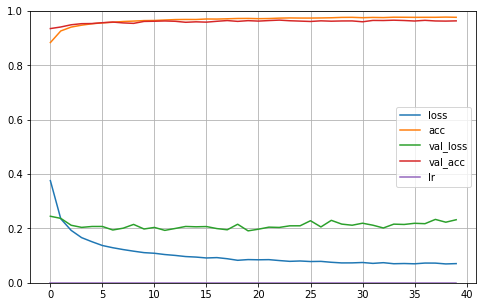

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

From the plot above, this provides clear details of the normal training loss and accuracy, aswell as the cross-validation training loss and accuracy. In terms of the accuracy, the normal model begins at 0.8838, while the cross-validation model begins at 0.9353. This is not particularly surprising given there is a 90:10 split, respectively. After approximately 5 epochs, both models achieve a consistent accuracy until the training is stopped due to the early stopping callback at 40 epochs.

If we now take our interest towards the losses achieved in both models, these are much more interesting. The loss achieved by the normal model was 0.3759 at the first epoch, compared to 0.2449 from the cross-validation model. The interesting view after this is that the loss of the normal model continues to decrease in short amounts. On the other hand, the cross-validation model loss remains close to the same value after 5 epochs, but fluctuates around on more than one occasion. Furthermore, as the normal model loss is much less than the cross-validation model loss, it is safe to confirm that overfitting is occuring during the training of this model.

**NB**: The accuracy and loss values follow a similar pattern for our two other models. However, the loss curves are much closer together as overfitting is not significantly affecting these models.

In [37]:
model_pred = model.predict_classes(X_train)
model_pred[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
model_pred_cv = model.predict_classes(X_valid)
model_pred_cv[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
## We need to convert the training labels back to single digits rather than one hot encoding

rounded_labels=np.argmax(y_train, axis=1)
rounded_labels[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
## We need to convert the cross-val labels back to single digits rather than one hot encoding

rounded_labels_cv=np.argmax(y_valid, axis=1)
rounded_labels_cv[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
## Comparing accuracy scores from training data and cross-val data

from sklearn.metrics import accuracy_score

model_acc = accuracy_score(rounded_labels, model_pred)
model_acc_cv = accuracy_score(rounded_labels_cv, model_pred_cv)

print("Training Accuracy:", model_acc)
print("Cross-Val Accuracy:", model_acc_cv)

Training Accuracy: 0.9941111111111111
Cross-Val Accuracy: 0.9636666666666667


In [42]:
## Implementing confusion matrix to evaluate the classified digits in the training data

from sklearn.metrics import confusion_matrix

model_cm = confusion_matrix(rounded_labels, model_pred)
model_cm

array([[5347,   47,    0,    2,    1,    0,    2,    0,    0,    1],
       [   4, 5388,    0,    1,    0,    0,    3,    2,    0,    2],
       [   2,    5, 5384,    0,    0,    0,    1,    1,    1,    6],
       [   2,    0,    0, 5376,    0,    1,    2,   16,    0,    3],
       [   3,    0,    0,    0, 5390,    1,    3,    0,    0,    3],
       [   1,   17,    2,    2,    9, 5359,    5,    2,    3,    0],
       [   1,    0,    0,    1,    1,    0, 5318,   67,    0,   12],
       [   2,    1,    0,    3,    0,    0,   21, 5373,    0,    0],
       [   7,    1,    0,    1,    2,    0,    2,    0, 5375,   12],
       [   4,    1,    0,    0,    2,    0,   18,    2,    1, 5372]])

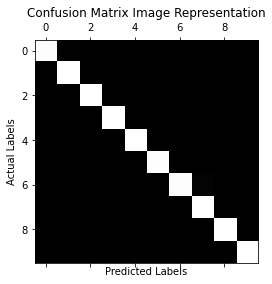

In [43]:
plt.matshow(model_cm, cmap=plt.cm.gray)
plt.title("Confusion Matrix Image Representation", x=0.5, y=1)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

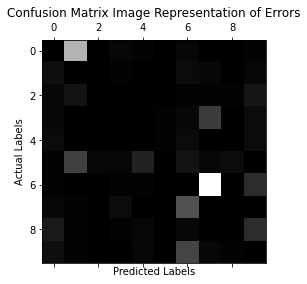

In [44]:
## Now lets check where the errors are occuring most

row_sums = model_cm.sum(axis=1, keepdims=True)
norm_model_cm = model_cm / row_sums

## Filling the leading diagonal with zeros to only keep the errors and plot results

np.fill_diagonal(norm_model_cm, 0)
plt.matshow(norm_model_cm, cmap=plt.cm.gray)
plt.title("Confusion Matrix Image Representation of Errors", x=0.5, y=1)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In terms of the first confusion matrix, this is a visualisation of how many of each digit was classified correctly. Unfortunately, due to the vast size of the training dataset, this does not give us much information as to which digits are being classified incorrectly. However, this is the reason the second confusion matrix has been drawn upon. This evidently points to which digits have been classified incorrectly the most often. In the case of the original ANN, the model seems to be classifying the digit "6" with the digit "7" more often than any other digit. Furthermore, the digit "0" is being classified as the digit "1". This may seem unusual, however, let us not forget this is the Kannada version of MNIST and that the labelled digits look very different to our native digits.

In [45]:
## Comparing precision and recall scores from training data

from sklearn.metrics import precision_score, recall_score

print("Training Precision:", precision_score(rounded_labels, model_pred, average='weighted'))
print("Training Recall:", recall_score(rounded_labels, model_pred, average='weighted'))

Training Precision: 0.9941381881598715
Training Recall: 0.9941111111111111


The scores of precision and recall shown above are determined from the first confusion matrix. They are formulated by the following expressions: True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN). TP and TN are assigned when a digit is classified correctly as being that digit and not being that digit, respectively. On the other hand, FP and FN are assigned when a digit has been classified incorrectly as being that digit and not being that digit, respectively. In terms of precision, this can be defined as the accuracy of the positive predictions. Whereas, recall can be defined as the ratio of positive instances that have been correctly identified. Moreover, the formulas for both precision and recall are shown below:

1. Precision = TP / TP + FP

2. Recall = TP / TP + FN

# 8.2 Convolutional Neural Networks (CNNs)

**8.2.1 Building the Model**

In [0]:
## Will use my CNN but use this to improve comments below this code

model_cnn = keras.models.Sequential()
model_cnn.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model_cnn.add(keras.layers.LeakyReLU(alpha = 0.1))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model_cnn.add(keras.layers.Dropout(0.25))

model_cnn.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model_cnn.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model_cnn.add(keras.layers.LeakyReLU(alpha = 0.1))
model_cnn.add(keras.layers.BatchNormalization()) 

model_cnn.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model_cnn.add(keras.layers.Dropout(0.25))

model_cnn.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn.add(keras.layers.LeakyReLU(alpha = 0.1))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.MaxPooling2D(pool_size=(1,2), strides=(1,2)))
model_cnn.add(keras.layers.Dropout(0.25))

model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(128, activation="relu"))
model_cnn.add(keras.layers.LeakyReLU(alpha = 0.1)) 
model_cnn.add(keras.layers.Dropout(0.25))
model_cnn.add(keras.layers.Dense(10, activation="softmax"))

The architecture of our CNN consists of a convolutional layer with the input shape, followed by another convolutional layer. These convolutional layers in a network systematically apply learned filters to input images in order to create feature maps that summarize the presence of those features in the input. This stacking of convolutional layers allows for a hierarchical decomposition of the input. 

The convolutional layers are then followed by the addition of a layer that utilises the LeakyRelu activation function. This was found to give a better score on the Kaggle competition than simply utilising the relu activation function and also had a slight improvement in training time. This improvement could be down to the fact that it fixes the “dying ReLU” problem, as it does not have zero-slope parts. Use of this activation function therefore mitigates the chance of a vanishing gradient and can help make sure our model is continually learning. 

The next step of our CNN is the implementation of a max pooling layer. The pooling layer works by analysing each feature map separately to create a new set of the same number of pooled feature maps. This downsamples the image sizes/feature maps, thus reducing the number of parameters and calculations in the network. This improves the efficiency of the network and avoids over-learning. In our model the pooling layers downsample the feature maps to a size of 2 x 2 pixels, with a stride of 2. This means it reduces the image size from 28 x 28 to 14 x 14. The max pooling function simply calculates the maximum value for each patch of the feature map. 

A dropout layer is then added after each pooling layer, these layers drop nodes during traning and is a useful technique to reduce the chance of overfitting and improve generalisation error, as discussed previously.

The combination of the above architecture is repeated three times until we implement the fully connected and output layers. The flatten operation and fully connected layers interpret the features and an output layer with a softmax activation for ten-class predictions is implemented. The final dense/fully connected layer outputs 10 (0 - 9) results in which these results of the convolutional layers are fed through the neural layers to generate a prediction.

In [47]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)       

In [48]:
model_cnn.layers

**8.2.2 Compiling the Model**

In [0]:
model_cnn.compile(loss = "categorical_crossentropy", # as we are using one-hot encode for the label data
              optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              #optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              metrics = ["accuracy"])

**8.2.3 Fitting the Model to the Training Data**

In [50]:
history = model_cnn.fit_generator(train_gen.flow(X_train_cnn, y_train_cnn, batch_size = 256), epochs=100, 
                                        validation_data=valid_datagen.flow(X_valid_cnn, y_valid_cnn, batch_size = 256), 
                                        callbacks=[learning_rate_reduction, early_stopping_lr], shuffle=True)

Epoch 1/100
211/211 [==============================] - 23s 109ms/step - loss: 0.8378 - acc: 0.7159 - val_loss: 7.0662 - val_acc: 0.1007
Epoch 2/100
211/211 [==============================] - 18s 87ms/step - loss: 0.2460 - acc: 0.9191 - val_loss: 1.2637 - val_acc: 0.6573
Epoch 3/100
211/211 [==============================] - 19s 90ms/step - loss: 0.1787 - acc: 0.9422 - val_loss: 0.1269 - val_acc: 0.9595
Epoch 4/100
211/211 [==============================] - 18s 87ms/step - loss: 0.1512 - acc: 0.9504 - val_loss: 0.0677 - val_acc: 0.9823
Epoch 5/100
211/211 [==============================] - 19s 89ms/step - loss: 0.1297 - acc: 0.9581 - val_loss: 0.0600 - val_acc: 0.9845
Epoch 6/100
211/211 [==============================] - 20s 93ms/step - loss: 0.1252 - acc: 0.9591 - val_loss: 0.0706 - val_acc: 0.9783
Epoch 7/100
211/211 [==============================] - 19s 90ms/step - loss: 0.1097 - acc: 0.9644 - val_loss: 0.0656 - val_acc: 0.9800
Epoch 8/100
211/211 [==============================] -

When training and validating our model, we have used the fit generator function, instead of the standard fit function. This is neccessary as we have applied data augmentation, which makes our data non-static. Since our image generator function loops infinitely, keras cannot know when an epoch starts and when it ends. The chosen batch size of 256 was found to be an ideal middle ground between keeping training time as low as possible while still ensuring the model was training and gaining accurate insights into the dataset.

**8.2.4 Evaluating the Training Set**

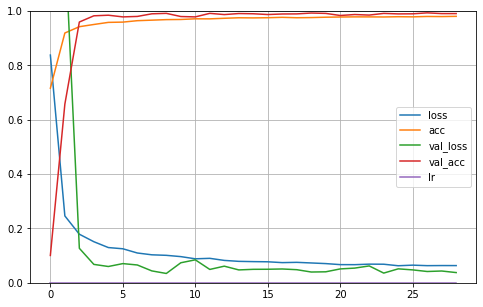

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-2]
plt.show()

In [52]:
model_pred_cnn = model_cnn.predict_classes(X_train_cnn)
model_pred_cnn[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
model_pred_cnn_cv = model_cnn.predict_classes(X_valid_cnn)
model_pred_cnn_cv[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
## We need to convert the training labels back to single digits rather than one hot encoding

rounded_labels_cnn=np.argmax(y_train_cnn, axis=1)
rounded_labels_cnn[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
## We need to convert the cross-val labels back to single digits rather than one hot encoding

rounded_labels_cnn_cv=np.argmax(y_valid_cnn, axis=1)
rounded_labels_cnn_cv[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
## Comparing accuracy scores from training data and cross-val data

from sklearn.metrics import accuracy_score

model_acc_cnn = accuracy_score(rounded_labels_cnn, model_pred_cnn)
model_acc_cnn_cv = accuracy_score(rounded_labels_cnn_cv, model_pred_cnn_cv)

print("Training Accuracy:", model_acc_cnn)
print("Cross-Val Accuracy:", model_acc_cnn_cv)

Training Accuracy: 0.994462962962963
Cross-Val Accuracy: 0.9905


Here we evaluate our model and obtain the accuracy score between our train and validation split of our training data. The accuracy of 0.9945 was obtained, indicating that it should do fairly well on the subset of test data we have. 

In [57]:
## Implementing confusion matrix to evaluate the classified digits in the training data

from sklearn.metrics import confusion_matrix

model_cnn_cm = confusion_matrix(rounded_labels_cnn, model_pred_cnn)
model_cnn_cm

array([[5375,   19,    1,    0,    0,    0,    0,    2,    3,    0],
       [  51, 5340,    0,    2,    0,    2,    0,    3,    0,    2],
       [   1,    0, 5393,    4,    0,    1,    0,    0,    0,    1],
       [   2,    0,    2, 5345,    0,   10,    0,   40,    1,    0],
       [   0,    0,    0,    0, 5383,   14,    0,    1,    1,    1],
       [   0,    0,    0,    0,    0, 5400,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0, 5292,   59,    0,   48],
       [   0,    0,    3,    3,    0,    0,    5, 5389,    0,    0],
       [   1,    0,    0,    0,    1,    0,    0,    0, 5395,    3],
       [   1,    0,    0,    0,    0,    0,    9,    1,    0, 5389]])

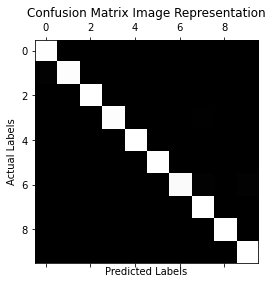

In [58]:
plt.matshow(model_cnn_cm, cmap=plt.cm.gray)
plt.title("Confusion Matrix Image Representation", x=0.5, y=1)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

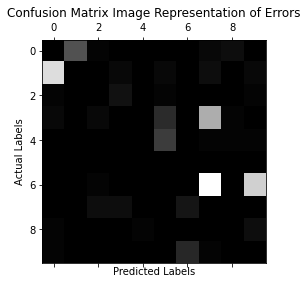

In [59]:
## Now lets check where the errors are occuring most

row_sums = model_cnn_cm.sum(axis=1, keepdims=True)
norm_model_cnn_cm = model_cnn_cm / row_sums

## Filling the leading diagonal with zeros to only keep the errors and plot results

np.fill_diagonal(norm_model_cnn_cm, 0)
plt.matshow(norm_model_cnn_cm, cmap=plt.cm.gray)
plt.title("Confusion Matrix Image Representation of Errors", x=0.5, y=1)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [60]:
## Comparing precision and recall scores from training data

from sklearn.metrics import precision_score, recall_score

print("Training Precision:", precision_score(rounded_labels_cnn, model_pred_cnn, average='weighted'))
print("Training Recall:", recall_score(rounded_labels_cnn, model_pred_cnn, average='weighted'))

Training Precision: 0.9945047665704208
Training Recall: 0.994462962962963


# 8.3 Convolutional Recurrent Neural Networks (CRNNs)

**8.3.1 Building the Model**

In [61]:
from tensorflow.keras.layers import TimeDistributed, Bidirectional, GRU

model_crnn = keras.models.Sequential()
model_crnn.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model_crnn.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'Same', activation = 'relu'))
model_crnn.add(keras.layers.LeakyReLU(alpha = 0.1))
model.add(keras.layers.BatchNormalization())

model_crnn.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model_crnn.add(keras.layers.Dropout(0.25))

model_crnn.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_crnn.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'Same', activation = 'relu'))
model_crnn.add(keras.layers.LeakyReLU(alpha = 0.1))
model_crnn.add(keras.layers.BatchNormalization()) 

model_crnn.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model_crnn.add(keras.layers.Dropout(0.25))

model_crnn.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_crnn.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_crnn.add(keras.layers.LeakyReLU(alpha = 0.1))
model_crnn.add(keras.layers.BatchNormalization())

model_crnn.add(keras.layers.MaxPooling2D(pool_size=(1,2), strides=(1,2)))
model_crnn.add(keras.layers.Dropout(0.25))

#Start of the RNN part of the network. 
model_crnn.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
model_crnn.add(keras.layers.Bidirectional(GRU(128, return_sequences = True)))
model_crnn.add(keras.layers.Flatten())
model_crnn.add(keras.layers.Dense(128, activation = "relu"))
model_crnn.add(keras.layers.Dense(64, activation = "relu"))
model_crnn.add(keras.layers.Dense(32, activation = "relu"))
model_crnn.add(keras.layers.Dropout(0.25))
model_crnn.add(keras.layers.Dense(10, activation = "softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


CRNN was the final model created for this investigation. This was chosen to see if there could be any benefits drawn from the RNN, despite CNN's being the better performers for image analysis and classification. The CNN part of the model is identical to the original CNN.

With reference to the RNN phase of our model, the features from the CNN are fed to a Bidirectional gated current unit (GRU). This means that it is essentially two seprate RNN's, where one is fed with an input sequence in normal time order, while the other is in reverse time order. The idea was that the RNN part of the architecture would be able to add another level of learning to our model as it can learn temporal information, unlike the CNN that only consumes spatial information. This was intially thought to be of benefit as it would allow the model to a predict subsequent values.

In [62]:
model_crnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)       

In [63]:
model_crnn.layers

**8.3.2 Compiling the Model**

In [0]:
model_crnn.compile(loss = "categorical_crossentropy", # as we are using one-hot encode for the label data
              optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              #optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              metrics = ["accuracy"])

**8.3.3 Fitting the Model to the Training Data**

In [65]:
history = model_crnn.fit_generator(train_gen.flow(X_train_crnn, y_train_crnn,batch_size=512), epochs=100, 
                                        validation_data=valid_datagen.flow(X_valid_crnn, y_valid_crnn,batch_size=512), 
                                        callbacks=[learning_rate_reduction, early_stopping_lr], shuffle=True)

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
106/106 [==============================] - 24s 230ms/step - loss: 1.0361 - acc: 0.6403 - val_loss: 2.3133 - val_acc: 0.1028
Epoch 2/100
106/106 [==============================] - 17s 163ms/step - loss: 0.2814 - acc: 0.9159 - val_loss: 1.6791 - val_acc: 0.4342
Epoch 3/100
106/106 [==============================] - 18s 167ms/step - loss: 0.2039 - acc: 0.9412 - val_loss: 0.3391 - val_acc: 0.8918
Epoch 4/100
106/106 [==============================] - 18s 167ms/step - loss: 0.1732 - acc: 0.9494 - val_loss: 0.0722 - val_acc: 0.9767
Epoch 5/100
106/106 [==============================] - 18s 168ms/step - loss: 0.1485 - acc: 0.9554 - val_loss: 0.0733 - val_acc: 0.9790
Epoch 6/100
106/106 [==============================] - 18s 167ms/step - loss: 0.1328 - acc: 0.9602 - val_loss: 0.0553 - val_acc: 0.9855
Epoch 7/100
106/106 [==============================] - 18s 168ms/step - loss: 0.1234 - acc

**8.3.4 Evaluating the Training Set**

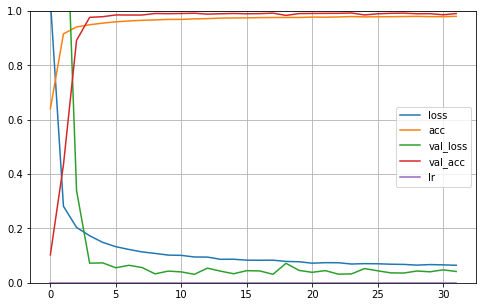

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-2]
plt.show()

In [67]:
model_pred_crnn = model_crnn.predict_classes(X_train_crnn)
model_pred_crnn[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
model_pred_crnn_cv = model_crnn.predict_classes(X_valid_crnn)
model_pred_crnn_cv[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
## We need to convert the training labels back to single digits rather than one hot encoding

rounded_labels_crnn=np.argmax(y_train_crnn, axis=1)
rounded_labels_crnn[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
## We need to convert the cross-val labels back to single digits rather than one hot encoding

rounded_labels_crnn_cv=np.argmax(y_valid_crnn, axis=1)
rounded_labels_crnn_cv[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
## Comparing accuracy scores from training data and cross-val data

from sklearn.metrics import accuracy_score

model_acc_crnn = accuracy_score(rounded_labels_crnn, model_pred_crnn)
model_acc_crnn_cv = accuracy_score(rounded_labels_crnn_cv, model_pred_crnn_cv)

print("Training Accuracy:", model_acc_crnn)
print("Cross-Val Accuracy:", model_acc_crnn_cv)

Training Accuracy: 0.9962222222222222
Cross-Val Accuracy: 0.9906666666666667


The results from the training data would suggest that the CRNN model would perform slightly better on the test dataset than the CNN model. However, due to the larger difference between the normal model accuracy (0.9962) and the cross-validation model accuracy (0.9907), the CNN actually performs slightly better. This score was achieved over 32 epochs and a higher batch size of 512. This increased batch size may be the reason why this model has not performed as well, however, due to time and power constraints it would have taken too long to train such a model with a smaller batch size. 

In [72]:
## Implementing confusion matrix to evaluate the classified digits in the training data

from sklearn.metrics import confusion_matrix

model_crnn_cm = confusion_matrix(rounded_labels_crnn, model_pred_crnn)
model_crnn_cm

array([[5373,   18,    3,    0,    0,    0,    0,    0,    6,    0],
       [  30, 5360,    3,    2,    0,    0,    0,    1,    1,    3],
       [   0,    0, 5399,    1,    0,    0,    0,    0,    0,    0],
       [   3,    0,    5, 5379,    1,    0,    1,   11,    0,    0],
       [   0,    0,    1,    0, 5393,    3,    0,    0,    3,    0],
       [   0,    0,    0,    1,    0, 5399,    0,    0,    0,    0],
       [   0,    0,    2,    0,    0,    0, 5355,   34,    1,    8],
       [   1,    1,    1,    7,    0,    0,    9, 5381,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5398,    2],
       [   0,    0,    1,    0,    0,    0,   39,    1,    0, 5359]])

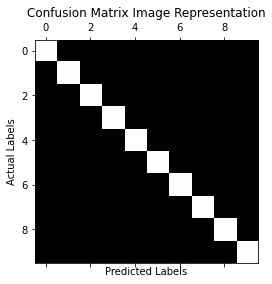

In [73]:
plt.matshow(model_crnn_cm, cmap=plt.cm.gray)
plt.title("Confusion Matrix Image Representation", x=0.5, y=1)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

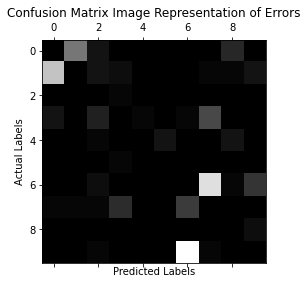

In [74]:
## Now lets check where the errors are occuring most

row_sums = model_crnn_cm.sum(axis=1, keepdims=True)
norm_model_crnn_cm = model_crnn_cm / row_sums

## Filling the leading diagonal with zeros to only keep the errors and plot results

np.fill_diagonal(norm_model_crnn_cm, 0)
plt.matshow(norm_model_crnn_cm, cmap=plt.cm.gray)
plt.title("Confusion Matrix Image Representation of Errors", x=0.5, y=1)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [75]:
## Comparing precision and recall scores from training data

from sklearn.metrics import precision_score, recall_score

print("Training Precision:", precision_score(rounded_labels_crnn, model_pred_crnn, average='weighted'))
print("Training Recall:", recall_score(rounded_labels_crnn, model_pred_crnn, average='weighted'))

Training Precision: 0.996226352060381
Training Recall: 0.9962222222222222


# 9. Evaluating Our Models on the Test Set

# 9.1 Original ANN

In [0]:
y_test_pred = model.predict(X_test)

In [77]:
y_test_pred[:5]

array([[0.99950033, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99950033, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99950033, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99950033, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.99950033,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [78]:
y_pred = model.predict_classes(X_test)
y_pred[:5]

array([0, 1, 2, 3, 4])

# 9.2 CNN

In [0]:
y_test_pred_cnn = model_cnn.predict(X_test_cnn)

In [80]:
y_test_pred_cnn[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [81]:
y_pred_cnn = model_cnn.predict_classes(X_test_cnn)
y_pred_cnn[:5]

array([0, 1, 2, 3, 4])

# 9.3 CRNN

In [0]:
y_test_pred_crnn = model_crnn.predict(X_test_crnn)

In [83]:
y_test_pred_crnn[:5]

array([[9.9769092e-01, 7.5192272e-04, 4.2705412e-04, 5.9628379e-05,
        5.8803329e-07, 9.8773410e-07, 3.7408778e-08, 1.8218140e-07,
        1.0685846e-03, 1.3456344e-07],
       [1.5012069e-03, 9.9843770e-01, 3.6081539e-07, 5.8547248e-05,
        7.3954872e-08, 6.4452166e-07, 8.7789498e-10, 1.4709934e-06,
        1.2649532e-08, 5.2620952e-10],
       [3.2995806e-10, 5.4812319e-09, 9.9999857e-01, 1.3764516e-06,
        3.6379889e-13, 4.8411736e-10, 1.5995593e-09, 1.5664505e-09,
        2.1729070e-12, 1.0891378e-12],
       [1.7272156e-11, 1.8597663e-11, 2.4999391e-09, 9.9999976e-01,
        4.8233792e-11, 2.7806044e-08, 1.3843905e-11, 1.9747050e-07,
        2.1284446e-12, 6.8497372e-13],
       [3.2020529e-14, 5.6548954e-10, 5.3274388e-11, 1.2260405e-07,
        9.9999988e-01, 3.6251052e-08, 1.8134584e-11, 4.8905862e-12,
        6.7391337e-09, 2.1046873e-12]], dtype=float32)

In [84]:
y_pred_crnn = model_crnn.predict_classes(X_test_crnn)
y_pred_crnn[:5]

array([0, 1, 2, 3, 4])

# 10. Creating DataFrames for Our Submissions

# 10.1 Original ANN

In [85]:
#Creating columns for submission in pandas dataframe

ann_sub = pd.DataFrame({"id":mnist_test["id"], "label":y_pred})
ann_sub.head()

,id,label
0,60001,0
1,60002,1
2,60003,2
3,60004,3
4,60005,4


# 10.2 CNN

In [86]:
#Creating columns for submission in pandas dataframe

cnn_sub = pd.DataFrame({"id":mnist_test["id"], "label":y_pred_cnn})
cnn_sub.head()

,id,label
0,60001,0
1,60002,1
2,60003,2
3,60004,3
4,60005,4


# 10.3 CRNN

In [87]:
#Creating columns for submission in pandas dataframe

crnn_sub = pd.DataFrame({"id":mnist_test["id"], "label":y_pred_crnn})
crnn_sub.head()

,id,label
0,60001,0
1,60002,1
2,60003,2
3,60004,3
4,60005,4


# 11. Converting our Predictions into CSV Format

# 11.1 Original ANN

In [0]:
#Converting data frame to csv for submission

ann_filename = "MNIST_ANN_Model_Predictions2.csv"

ann_sub.to_csv(ann_filename, index = False, header = 1)

# 11.2 CNN

In [0]:
#Converting data frame to csv for submission

cnn_filename = "MNIST_CNN_Model_Predictions2.csv"

cnn_sub.to_csv(cnn_filename, index = False, header = 1)

# 11.3 CRNN

In [0]:
#Converting data frame to csv for submission

crnn_filename = "MNIST_CRNN_Model_Predictions2.csv"

crnn_sub.to_csv(crnn_filename, index = False, header = 1)

# 12. Summary of the Models Performance

In [0]:
# Comparing all of the models accuracy scores for the training and test data

model_performance_acc = pd.DataFrame({'Model': ['Original ANN',
                                                 'CNN',
                                                 'CRNN'],
                                       'Accuracy - Train (Normal)' : [model_acc,
                                                model_acc_cnn,
                                                model_acc_crnn],
                                       'Accuracy - Train (Cross-Val)' : [model_acc_cv,
                                                model_acc_cnn_cv,
                                                model_acc_crnn_cv],
                                        'Accuracy - Test': ['0.89900',
                                                        '0.98066',
                                                        '0.97466']})

In [92]:
model_performance_acc

,Model,Accuracy - Train (Normal),Accuracy - Train (Cross-Val),Accuracy - Test
0,Original ANN,0.994111,0.963667,0.89900
1,CNN,0.994463,0.990500,0.98066
2,CRNN,0.996222,0.990667,0.97466


**Original ANN** - For the orginal ANN model, the two training accuracy scores of 0.9941 and 0.9637 are from the normal model and the cross-validation model, respectively. This shows that the normal training model was much more accurate than the cross-validation model, which suggests overfitting. Furthermore, with reference to the accuracy of the test model (0.8990), this gives further evidence that the model has been overfitting. Despite this, the original ANN model was primarily used as a baseline for our other two models. Therefore, an accuracy close to 90% is a suitable boundary for this specific dataset.

**CNN** - With reference to both of our training accuracy scores for the CNN model, these were both very similar with a difference of only 0.0040. This is a major indication that our model has not been susceptible to overfitting the data and can be ready for testing. In addition, our test model gave us an accuracy score of 0.9807. However, even though this is slightly less accurate than our training models, it is highly expected that a test model will be at least slightly less accurate which is the case here. Despite this, our test accuracy is the highest out of our three models and at the moment is within the top 10 submissions on the Kaggle competition page.

**CRNN** - As was the case with the CNN model, the training accuracy scores for the normal model (0.9962) and the cross-validation model (0.9907) imply that overfitting of the data was not encountered here. Moreover, as our CRNN model still encorporates a CNN model, we would expect the results to be relatively similar. This is emphasised due to the fact that the accuracy difference between the training scores was 0.0056; only 0.0014 greater than the CNN model. Taking all of this into account, as the difference in scores was slightly greater for this model, this evidently is the reason behind it falling just short of the CNN model test accuracy.

**NB**: The test accuracy scores given above are the most accurate for each individual model tested.

# 13. Conclusion

In conclusion, we have successfully carried out the predominant aim of the investigation to classify the digits between 0 and 9 of the Kannada MNIST test dataset. This involved taking a training dataset and applying a host of machine learning techniques involving neural networks to achieve a high accuracy for this classification problem. Unlike our first assignment, feature engineering was not necessary for this specific dataset. However, with respect to our CNN and CRNN models, data augmentation was required. This provided the models with more images of each digit and, hence, improved the accuracy of our test scores.

The three ML models we chose to use were as follows: An original ANN, a CNN, and a CRNN. The original ANN was crucial as it acted as a starting point to our investigation. This baseline allowed us to compare the test accuracy with more complex models. The CNN gave us the highest test accuracy score of 0.9807. This ended up being much greater than our baseline accuracy of 0.8990. Furthermore, this was also slightly greater than our CRNN model of 0.9747. This shows that convolutional neural networks are essentially needed to achieve high accuracy in tasks such as this. To improve our accuracy, one method we could implement next time could be to add more hidden layers to the CNN model. However, we cannot add too many more otherwise overfitting could occur.